In [1]:
import os
os.environ['autocnet_config'] = '/home/jlaura/autocnet_projects/demo.yml'
from autocnet_server.graph.graph import NetworkCandidateGraph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Ring Matching
TODO: Docs...

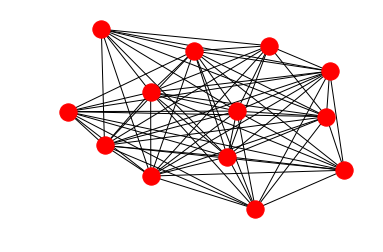

In [2]:
ncg = NetworkCandidateGraph.from_database()
ncg.plot()

In [3]:
ncg.ring_match(walltime='00:01:00')

72